This data was taken from wikipedia pages on marvel and dc films.  It includes more movies that were missing from the previous dataset taken from kaggle.

In [394]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [395]:
url = 'https://en.wikipedia.org/wiki/List_of_films_based_on_Marvel_Comics_publications'
dc_url = 'https://en.wikipedia.org/wiki/List_of_films_based_on_DC_Comics_publications'

dfs = pd.read_html(url)
dc_dfs = pd.read_html(dc_url)

In [396]:
df = dfs[14] #Table 14 is the one with the budgets and box office gross 
df = df.iloc[:-2].copy() #-2 to remove the total and average row included in the table

dc_df = dc_dfs[12]
dc_df = dc_df.iloc[:-2].copy()

In [397]:
#Fixed column names and multilevel
col_name = ['Title', 'Distributors', 'Release date', 'Budget', 'Box Office Opening Weekend NA', 'Box Office Gross NA', 'Other Box Office Gross', 'Box Office Gross Worldwide']
dc_col_name = ['Title', 'Distributors', 'Release date', 'Budget', 'Box Office Opening Weekend NA', 'Box Office Gross NA', 'Box Office Gross Worldwide']

df.columns = df.columns.get_level_values(0)
df.columns = col_name

dc_df.columns = dc_df.columns.get_level_values(0)
dc_df.columns = dc_col_name

df.head()

,Title,Distributors,Release date,Budget,Box Office Opening Weekend NA,Box Office Gross NA,Other Box Office Gross,Box Office Gross Worldwide
0,Howard the Duck,Universal Pictures,"August 1, 1986",$37,"$5,070,136","$16,295,774","$21,667,000","$37,962,774"
1,Blade,New Line Cinema,"August 21, 1998",$45,"$17,073,856","$70,087,718","$61,095,812","$131,183,530"
2,X-Men,20th Century Fox,"July 14, 2000",$75,"$54,471,475","$157,299,717","$139,039,810","$296,339,527"
3,Blade II,New Line Cinema,"March 22, 2002",$54,"$32,528,016","$82,348,319","$72,661,713","$155,010,032"
4,Spider-Man,Sony Pictures,"May 3, 2002",$139,"$114,844,116","$403,706,375","$418,002,176","$821,708,551"


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
Title                            59 non-null object
Distributors                     59 non-null object
Release date                     59 non-null object
Budget                           58 non-null object
Box Office Opening Weekend NA    59 non-null object
Box Office Gross NA              59 non-null object
Other Box Office Gross           59 non-null object
Box Office Gross Worldwide       59 non-null object
dtypes: object(8)
memory usage: 3.8+ KB


In [399]:
df[df['Budget'].isna()]

,Title,Distributors,Release date,Budget,Box Office Opening Weekend NA,Box Office Gross NA,Other Box Office Gross,Box Office Gross Worldwide
46,Inhumans,IMAX Entertainment,"September 1, 2017",NaN,"$1,500,000","$1,521,787","$1,330,495","$2,852,282"


Inhumans is a tv series where the first two episodes ran in Imax theaters.  The budget would be for the eight episodes that ran. I don't think it can be compare to the other movies so I will drop it.

In [400]:
df.drop(df[df['Title'] == 'Inhumans'].index, inplace=True)

In [401]:
# Changed data type of budget and box office columns
df['Budget'] = df['Budget'].str.replace('$','').astype('float64')
df['Box Office Opening Weekend NA'] = df['Box Office Opening Weekend NA'].str.replace('$','').str.replace(',','').astype('float64')
df['Box Office Gross NA'] = df['Box Office Gross NA'].str.replace('$','').str.replace(',','').astype('float64')
df['Other Box Office Gross'] = df['Other Box Office Gross'].str.replace('$','').str.replace(',','').astype('float64')
df['Box Office Gross Worldwide'] = df['Box Office Gross Worldwide'].str.replace('$','').str.replace(',','').astype('float64')

In [402]:
# Changed these columns to dollar in millions to match the budget column
df['Box Office Gross NA'] = df['Box Office Gross NA']  / 1000000
df['Box Office Opening Weekend NA'] = df['Box Office Opening Weekend NA'] / 1000000
df['Other Box Office Gross'] = df['Other Box Office Gross'] / 1000000
df['Box Office Gross Worldwide'] = df['Box Office Gross Worldwide'] / 1000000

In [403]:
# Changed Release Date to datetime
df['Release date'] = pd.to_datetime(df['Release date'])

In [404]:
df[df['Title'] == 'Fantastic Four']

,Title,Distributors,Release date,Budget,Box Office Opening Weekend NA,Box Office Gross NA,Other Box Office Gross,Box Office Gross Worldwide
12,Fantastic Four,20th Century Fox,2005-07-08,100.0,56.061504,154.696080,175.883639,330.579719
38,Fantastic Four,20th Century Fox,2015-08-07,120.0,25.685737,56.117548,111.765333,167.882881


In [405]:
#Put the year in titles that are the same
df.iloc[12,0] = 'Fantastic Four (2005)'
df.iloc[38,0] = 'Fantastic Four (2015)'

In [406]:
df['Profit/Loss NA'] = df['Box Office Gross NA'] - df['Budget']
df['Profit/Loss World'] = df['Box Office Gross Worldwide'] - df['Budget']
df['Category'] = 'Marvel'

In [407]:
df.head()

,Title,Distributors,Release date,Budget,Box Office Opening Weekend NA,Box Office Gross NA,Other Box Office Gross,Box Office Gross Worldwide,Profit/Loss NA,Profit/Loss World,Category
0,Howard the Duck,Universal Pictures,1986-08-01,37.0,5.070136,16.295774,21.667000,37.962774,-20.704226,0.962774,Marvel
1,Blade,New Line Cinema,1998-08-21,45.0,17.073856,70.087718,61.095812,131.183530,25.087718,86.183530,Marvel
2,X-Men,20th Century Fox,2000-07-14,75.0,54.471475,157.299717,139.039810,296.339527,82.299717,221.339527,Marvel
3,Blade II,New Line Cinema,2002-03-22,54.0,32.528016,82.348319,72.661713,155.010032,28.348319,101.010032,Marvel
4,Spider-Man,Sony Pictures,2002-05-03,139.0,114.844116,403.706375,418.002176,821.708551,264.706375,682.708551,Marvel


In [408]:
dc_df.drop(dc_df[dc_df['Box Office Gross NA'].isna()].index,inplace=True)
dc_df.drop(dc_df[dc_df['Budget'].isna()].index,inplace=True)

dc_df.head()

,Title,Distributors,Release date,Budget,Box Office Opening Weekend NA,Box Office Gross NA,Box Office Gross Worldwide
0,Superman,Warner Bros.,"December 10, 1978",$55,"$6,535,784","$134,218,018","$300,218,018"
1,Superman II,Warner Bros.,"June 19, 1981",$54,"$14,100,523","$108,185,706","$108,185,706"
3,Superman III,Warner Bros.,"June 17, 1983",$39,"$13,352,357","$59,950,623","$59,950,623"
4,Supergirl,TriStar Pictures,"November 21, 1984",$35,"$5,738,249","$14,296,438","$14,296,438"
5,Superman IV: The Quest for Peace,Warner Bros.,"July 24, 1987",$17,"$5,683,122","$15,681,020","$15,681,020"


In [409]:
# Changed data type of budget and box office columns
dc_df['Budget'] = dc_df['Budget'].str.replace('$','').astype('float64')
dc_df['Box Office Opening Weekend NA'] = dc_df['Box Office Opening Weekend NA'].str.replace('$','').str.replace(',','').astype('float64')
dc_df['Box Office Gross NA'] = dc_df['Box Office Gross NA'].str.replace('$','').str.replace(',','').astype('float64')
dc_df['Box Office Gross Worldwide'] = dc_df['Box Office Gross Worldwide'].str.replace('$','').str.replace(',','').astype('float64')

In [410]:
# Changed these columns to dollar in millions to match the budget column
dc_df['Box Office Gross NA'] = dc_df['Box Office Gross NA']  / 1000000
dc_df['Box Office Opening Weekend NA'] = dc_df['Box Office Opening Weekend NA'] / 1000000
dc_df['Box Office Gross Worldwide'] = dc_df['Box Office Gross Worldwide'] / 1000000

dc_df['Other Box Office Gross'] = dc_df['Box Office Gross Worldwide'] - dc_df['Box Office Gross NA']

In [411]:
dc_df['Profit/Loss NA'] = dc_df['Box Office Gross NA'] - dc_df['Budget']
dc_df['Profit/Loss World'] = dc_df['Box Office Gross Worldwide'] - dc_df['Budget']
dc_df['Category'] = 'DC'

In [412]:
# Changed Release Date to datetime
dc_df['Release date'] = pd.to_datetime(dc_df['Release date'])

In [413]:
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 35
Data columns (total 11 columns):
Title                            32 non-null object
Distributors                     32 non-null object
Release date                     32 non-null datetime64[ns]
Budget                           32 non-null float64
Box Office Opening Weekend NA    31 non-null float64
Box Office Gross NA              32 non-null float64
Box Office Gross Worldwide       32 non-null float64
Other Box Office Gross           32 non-null float64
Profit/Loss NA                   32 non-null float64
Profit/Loss World                32 non-null float64
Category                         32 non-null object
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 3.0+ KB


In [414]:
dc_df.head()

,Title,Distributors,Release date,Budget,Box Office Opening Weekend NA,Box Office Gross NA,Box Office Gross Worldwide,Other Box Office Gross,Profit/Loss NA,Profit/Loss World,Category
0,Superman,Warner Bros.,1978-12-10,55.0,6.535784,134.218018,300.218018,166.0,79.218018,245.218018,DC
1,Superman II,Warner Bros.,1981-06-19,54.0,14.100523,108.185706,108.185706,0.0,54.185706,54.185706,DC
3,Superman III,Warner Bros.,1983-06-17,39.0,13.352357,59.950623,59.950623,0.0,20.950623,20.950623,DC
4,Supergirl,TriStar Pictures,1984-11-21,35.0,5.738249,14.296438,14.296438,0.0,-20.703562,-20.703562,DC
5,Superman IV: The Quest for Peace,Warner Bros.,1987-07-24,17.0,5.683122,15.681020,15.681020,0.0,-1.318980,-1.318980,DC


In [415]:
mar_dc = pd.concat([df,dc_df], sort=False)
mar_dc.head()

,Title,Distributors,Release date,Budget,Box Office Opening Weekend NA,Box Office Gross NA,Other Box Office Gross,Box Office Gross Worldwide,Profit/Loss NA,Profit/Loss World,Category
0,Howard the Duck,Universal Pictures,1986-08-01,37.0,5.070136,16.295774,21.667000,37.962774,-20.704226,0.962774,Marvel
1,Blade,New Line Cinema,1998-08-21,45.0,17.073856,70.087718,61.095812,131.183530,25.087718,86.183530,Marvel
2,X-Men,20th Century Fox,2000-07-14,75.0,54.471475,157.299717,139.039810,296.339527,82.299717,221.339527,Marvel
3,Blade II,New Line Cinema,2002-03-22,54.0,32.528016,82.348319,72.661713,155.010032,28.348319,101.010032,Marvel
4,Spider-Man,Sony Pictures,2002-05-03,139.0,114.844116,403.706375,418.002176,821.708551,264.706375,682.708551,Marvel


In [416]:
mar_dc.sort_values('Box Office Gross NA', ascending=False, inplace=True)

In [417]:
sns.set_theme()

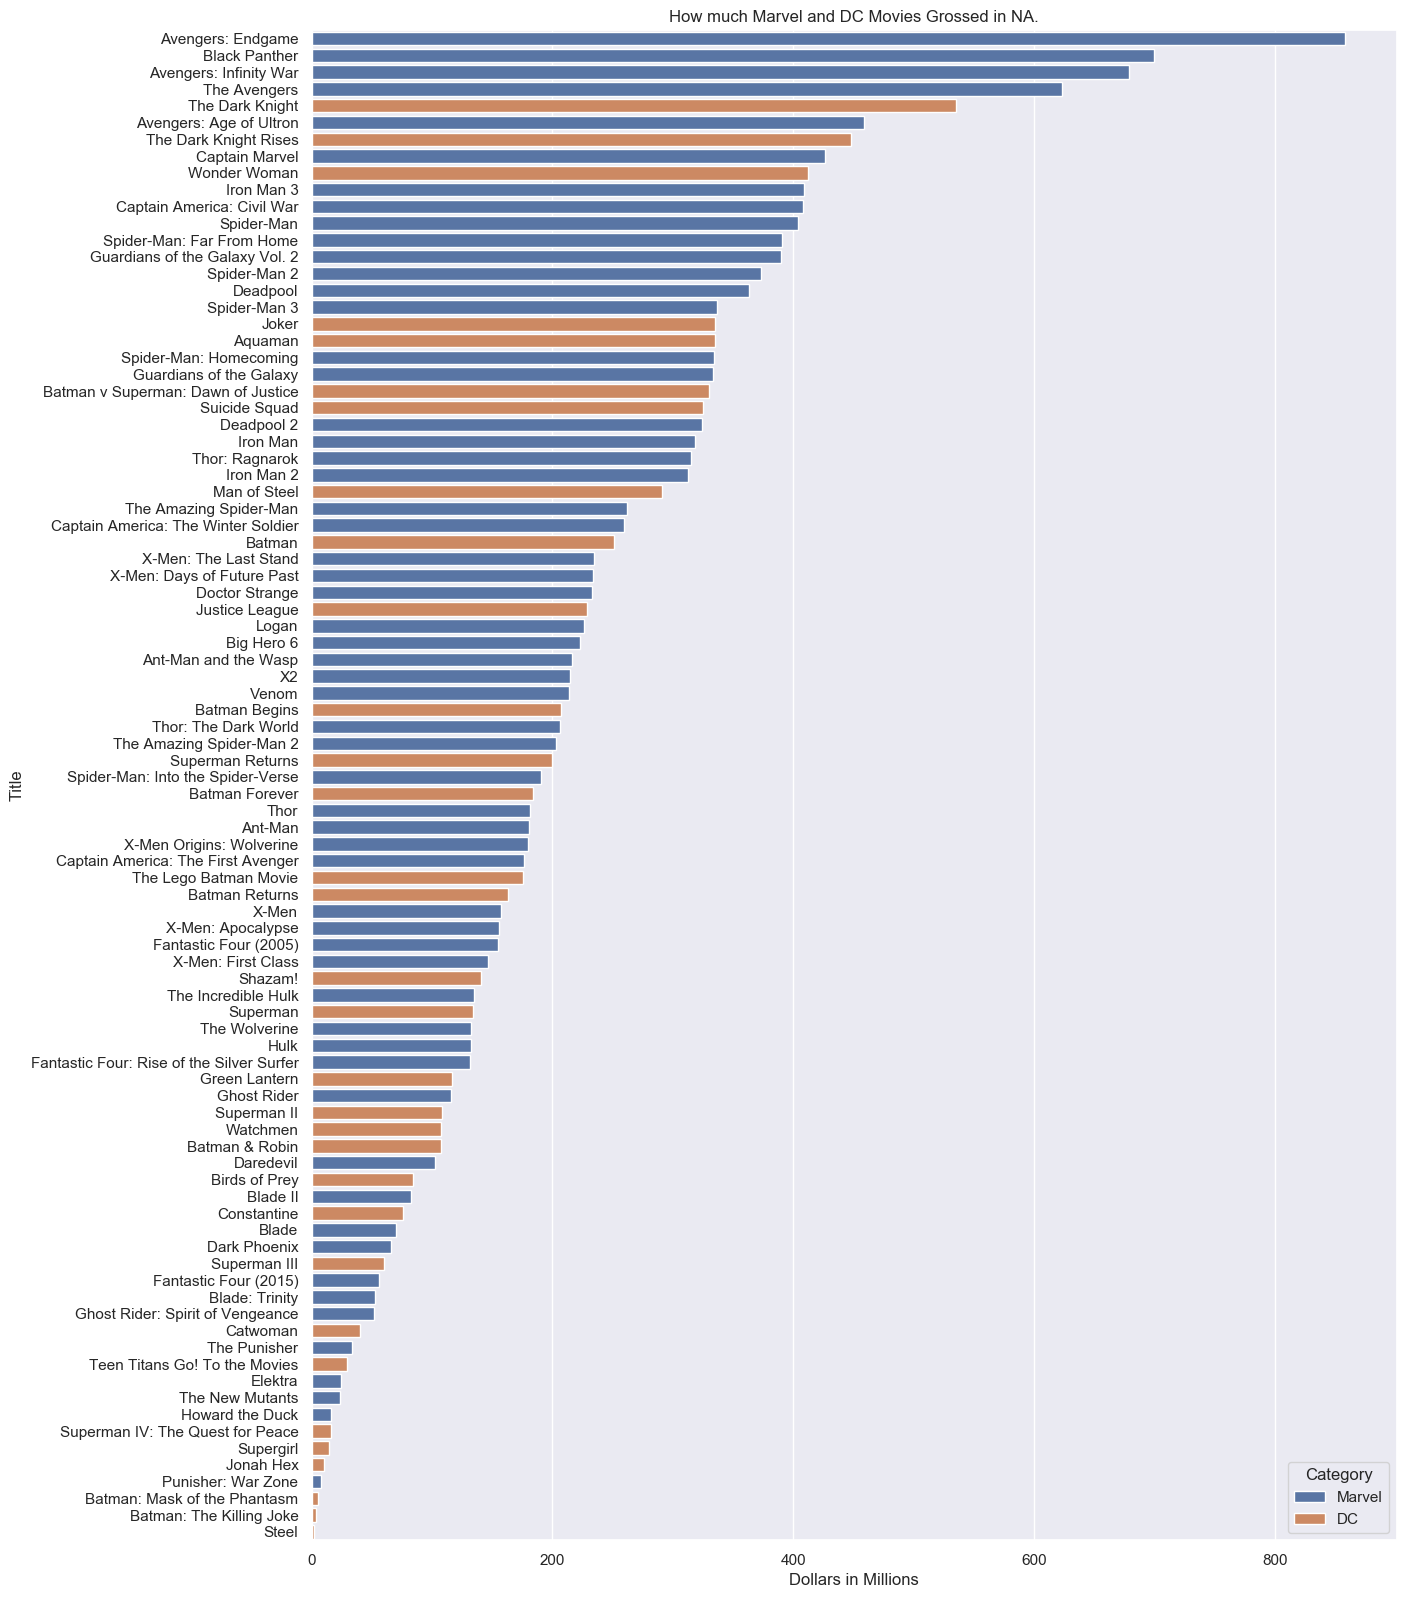

In [418]:
plt.figure(figsize=(14,20), dpi= 100, facecolor='w', edgecolor='k')
sns.barplot(x = 'Box Office Gross NA', y = 'Title',hue ='Category', data = mar_dc, dodge=False).set_title('How much Marvel and DC Movies Grossed in NA.')
plt.xlabel('Dollars in Millions')
plt.show()

In [419]:
mar_dc.sort_values('Profit/Loss NA', ascending=False, inplace=True)

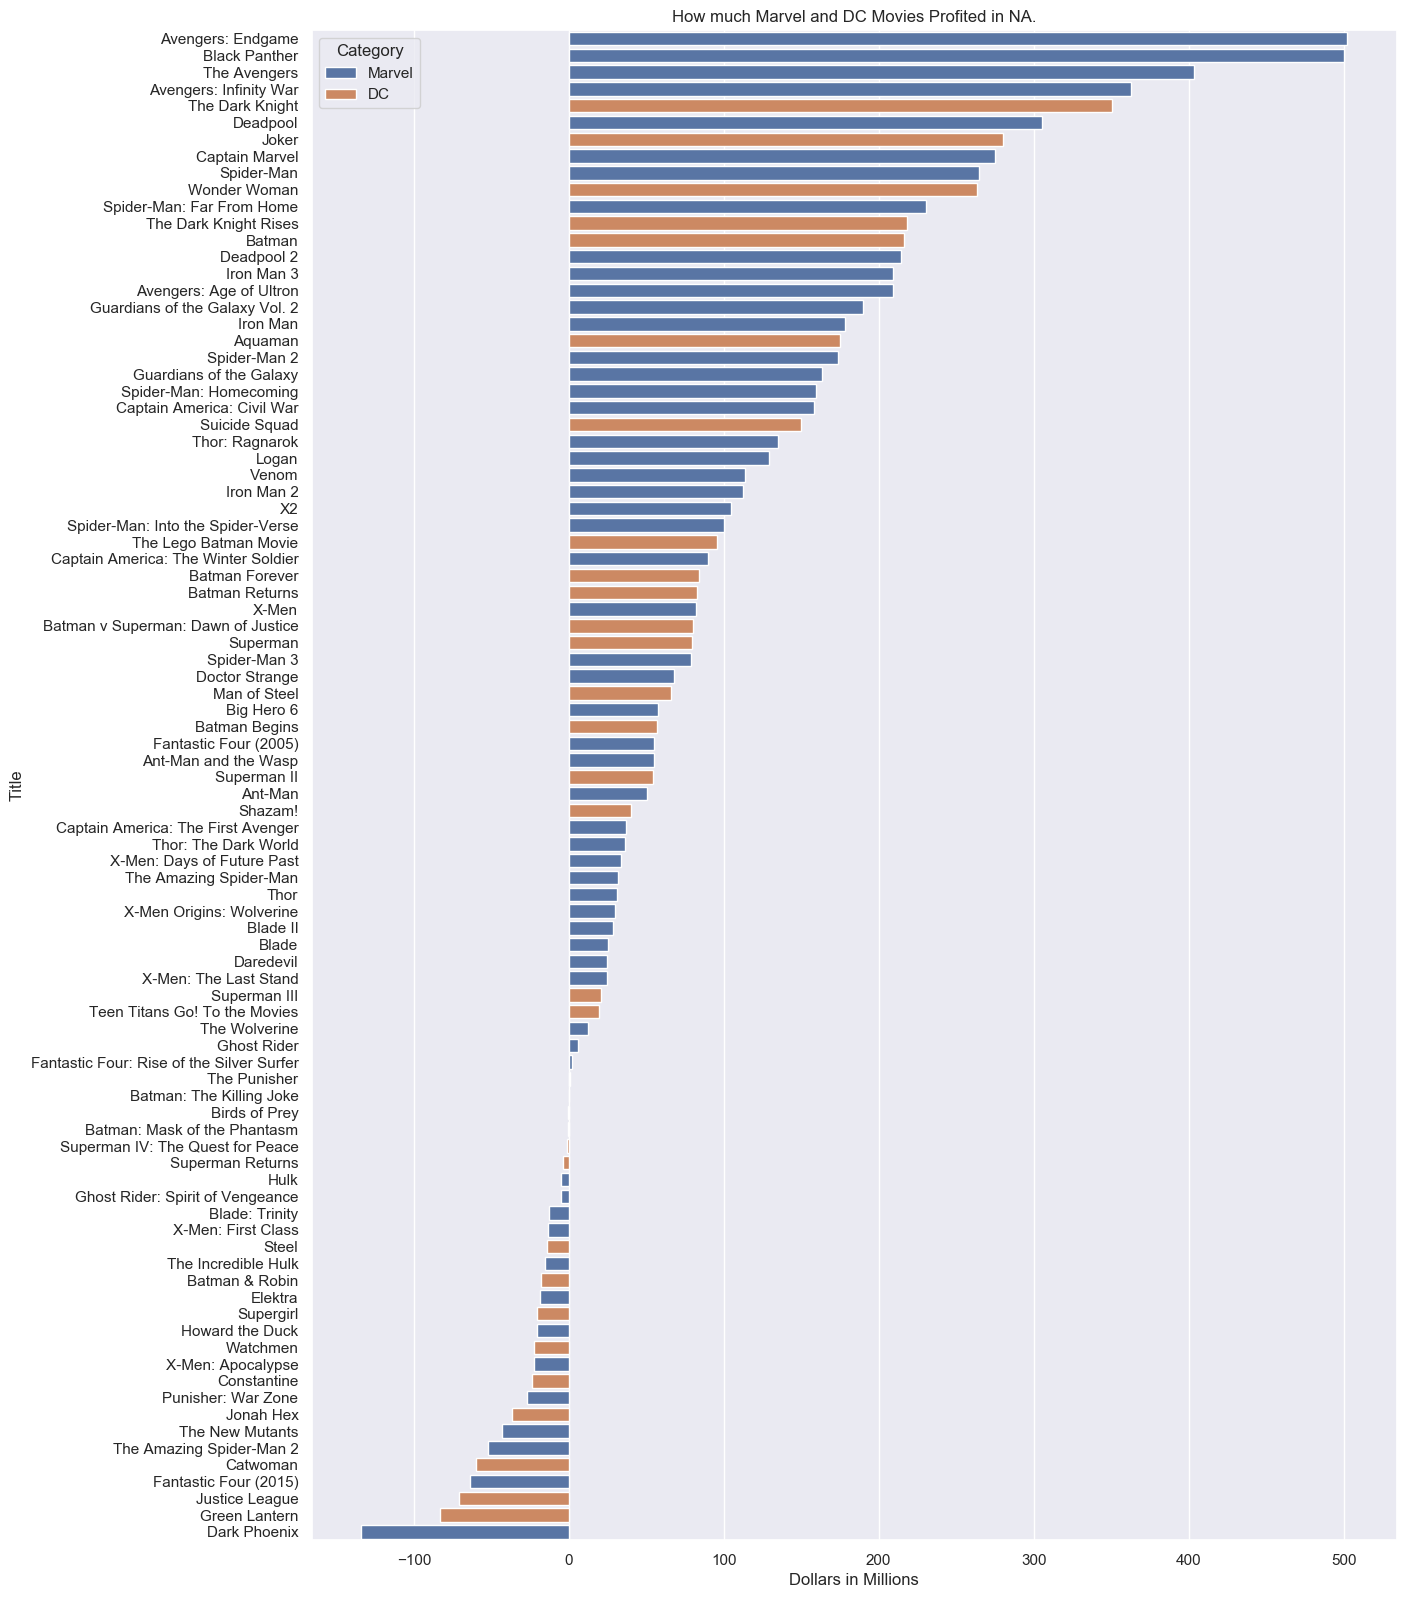

In [420]:
plt.figure(figsize=(14,20), dpi= 100, facecolor='w', edgecolor='k')
sns.barplot(x = 'Profit/Loss NA', y = 'Title',hue ='Category', data = mar_dc, dodge=False).set_title('How much Marvel and DC Movies Profited in NA.')
plt.xlabel('Dollars in Millions')
plt.show()